In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_rows', 1000000)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format',lambda x: '%.4f' % x)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.pyplot import figure
import matplotlib.pylab as pll
from collections import Counter
from datetime import datetime
import time
import random
import math
from sklearn.tree import DecisionTreeClassifier
import os
import itertools
from matplotlib import ticker
import matplotlib.colors as colors
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [2]:
slurm1 = pd.read_csv('SlurmPlot2.csv')
slurm1.tail(100)

,Unnamed: 0,UID,Account,JobID,AllocCPUS,AllocNodes,AssocID,AveCPU,AveCPUFreq,AveDiskRead,AveDiskWrite,AvePages,AveRSS,AveVMSize,Cluster,ConsumedEnergyRaw,CPUTime,CPUTimeRAW,DBIndex,Elapsed,ElapsedRaw,Eligible,End,ExitCode,JobIDRaw,Layout,MaxDiskRead,MaxDiskReadNode,MaxDiskReadTask,MaxDiskWrite,MaxDiskWriteNode,MaxDiskWriteTask,MaxPages,MaxPagesNode,MaxPagesTask,MaxRSS,MaxRSSNode,MaxRSSTask,MaxVMSize,MaxVMSizeNode,MaxVMSizeTask,NCPUS,NNodes,NodeList,NTasks,Priority,Partition,QOS,QOSRAW,ReqCPUFreq,ReqCPUFreqMin,ReqCPUFreqMax,ReqCPUFreqGov,ReqCPUS,ReqMem,ReqNodes,Reservation,ReservationId,Reserved,ResvCPU,ResvCPURAW,Start,State,Submit,SystemCPU,Timelimit,TimelimitRaw,TotalCPU,UserCPU,TRESAllocEnergy,TRESBilling,TRESAllocMem,TRESAllocCPU,TRESINAveUsageCpu,TRESINAveUsageFsordisk,TRESINAveUsagemem,TRESINAveUsagevmem,TRESINAveUsagepages,TRESINMaxUsageFsordisk,TRESINMaxUsagemem,TRESINMaxUsagevmem,TRESINMaxUsagepages,TRESINMaxNodeUsageFsordisk,TRESINMaxNodeUsagemem,TRESINMaxNodeUsagevmem,TRESINMaxNodeUsagepages,TRESINMaxTaskUsageFsordisk,TRESINMaxTaskUsagemem,TRESINMaxTaskUsagevmem,TRESINMaxTaskUsagepages,TRESOutAveUsageCpu,TRESOutAveUsageFsordisk,TRESOutAveUsagemem,TRESOutAveUsagevmem,TRESOutAveUsagepages,TRESOutMaxUsageFsordisk,TRESOutMaxUsagemem,TRESOutMaxUsagevmem,TRESOutMaxUsagepages,TRESOutMaxNodeUsageFsordisk,TRESOutMaxNodeUsagemem,TRESOutMaxNodeUsagevmem,TRESOutMaxNodeUsagepages,TRESOutMaxTaskUsageFsordisk,TRESOutMaxTaskUsagemem,TRESOutMaxTaskUsagevmem,TRESOutMaxTaskUsagepages,AveCPUtime,Reservedtime,TotalCPUtime,UserCPUtime,SystemCPUtime,Endtimestamp,Starttimestamp,Eligibletimestamp,Submittimestamp,Nodelistcn,Nodelistfpga,NodeLists
4215015,4215015,213.0000,77,1062949.extern,40,1,2174,00:00:00,3.1000,0.0000,0.0000,0.0000,0.8160,142.9440,noctua,6870.0000,00:16:00,960,6853569,00:00:24,24,2022-01-20 18:27:02,2022-01-20 18:27:26,0:0,1062949.extern,Unknown,0.0000,cn-0252,0.0000,0.0000,cn-0252,0.0000,0.0000,cn-0252,0.0000,0.8160,cn-0252,0.0000,142.9440,cn-0252,0.0000,40,1,cn-0252,1.0000,NaN,NaN,NaN,NaN,0,0,0,0,40,NaN,1,NaN,NaN,NaN,NaN,NaN,2022-01-20 18:27:02,COMPLETED,2022-01-20 18:27:02,00:00:00,NaN,NaN,00:00:00,00:00:00,NaN,40.0000,182000.0000,40.0000,00:00:00,844.0000,0.8160,142.9440,0.0000,844.0000,0.8160,142.9440,0.0000,cn-0252,cn-0252,cn-0252,cn-0252,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,844.0000,0.8160,142.9440,0.0000,cn-0252,cn-0252,cn-0252,cn-0252,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1642699646.0,1642699622.0,1642699622.0000,1642699622.0000,0,0,0
4215016,4215016,170.0000,81,1062950,40,1,464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noctua,25.0000,03:36:00,12960,6853570,00:05:24,324,2022-01-20 18:27:12,2022-01-20 18:33:40,0:0,1062950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,1,fpga-0010,NaN,350027.0000,fpga,cont,10.0000,Unknown,Unknown,Unknown,Unknown,1,182000.0000,1,NaN,NaN,00:01:04,00:01:04,64.0000,2022-01-20 18:28:16,COMPLETED,2022-01-20 18:27:12,00:00.015,00:10:00,10.0000,00:00.028,00:00.013,25.0000,40.0000,182000.0000,40.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0280,0.0130,0.0150,1642700020.0,1642699696.0,1642699632.0000,1642699632.0000,0,0,0
4215017,4215017,170.0000,81,1062950.batch,40,1,464,00:00:00,1.8100,0.0000,0.0000,0.0000,1.2520,141.3240,noctua,11.0000,03:36:00,12960,6853570,00:05:24,324,2022-01-20 18:28:16,2022-01-20 18:33:40,0:0,1062950.batch,Unknown,0.0000,fpga-0010,0.0000,0.0000,fpga-0010,0.0000,0.0000,fpga-0010,0.0000,1.2520,fpga-0010,0.0000,141.3240,fpga-0010,0.0000,40,1,fpga-0010,1.0000,NaN,NaN,NaN,NaN,0,0,0,0,40,NaN,1,NaN,NaN,NaN,NaN,NaN,2022-01-20 18:28:16,COMPLETED,2022-01-20 18:28:16,00:00.015,NaN,NaN,00:00.028,00:00.012,NaN,NaN,182000.0000,40.0000,00:00:00,0.0000,1.2520,141.3240,0.0000,0.0000,1.2520,141.3240,0.0000,fpga-0010,fpga-0010,fpga-0010,fpga-0010,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,0.0000,1.2520,141.3240,0.0000,fpga-0010,fpga

In [3]:
slurm1.tail(10)

,Unnamed: 0,UID,Account,JobID,AllocCPUS,AllocNodes,AssocID,AveCPU,AveCPUFreq,AveDiskRead,AveDiskWrite,AvePages,AveRSS,AveVMSize,Cluster,ConsumedEnergyRaw,CPUTime,CPUTimeRAW,DBIndex,Elapsed,ElapsedRaw,Eligible,End,ExitCode,JobIDRaw,Layout,MaxDiskRead,MaxDiskReadNode,MaxDiskReadTask,MaxDiskWrite,MaxDiskWriteNode,MaxDiskWriteTask,MaxPages,MaxPagesNode,MaxPagesTask,MaxRSS,MaxRSSNode,MaxRSSTask,MaxVMSize,MaxVMSizeNode,MaxVMSizeTask,NCPUS,NNodes,NodeList,NTasks,Priority,Partition,QOS,QOSRAW,ReqCPUFreq,ReqCPUFreqMin,ReqCPUFreqMax,ReqCPUFreqGov,ReqCPUS,ReqMem,ReqNodes,Reservation,ReservationId,Reserved,ResvCPU,ResvCPURAW,Start,State,Submit,SystemCPU,Timelimit,TimelimitRaw,TotalCPU,UserCPU,TRESAllocEnergy,TRESBilling,TRESAllocMem,TRESAllocCPU,TRESINAveUsageCpu,TRESINAveUsageFsordisk,TRESINAveUsagemem,TRESINAveUsagevmem,TRESINAveUsagepages,TRESINMaxUsageFsordisk,TRESINMaxUsagemem,TRESINMaxUsagevmem,TRESINMaxUsagepages,TRESINMaxNodeUsageFsordisk,TRESINMaxNodeUsagemem,TRESINMaxNodeUsagevmem,TRESINMaxNodeUsagepages,TRESINMaxTaskUsageFsordisk,TRESINMaxTaskUsagemem,TRESINMaxTaskUsagevmem,TRESINMaxTaskUsagepages,TRESOutAveUsageCpu,TRESOutAveUsageFsordisk,TRESOutAveUsagemem,TRESOutAveUsagevmem,TRESOutAveUsagepages,TRESOutMaxUsageFsordisk,TRESOutMaxUsagemem,TRESOutMaxUsagevmem,TRESOutMaxUsagepages,TRESOutMaxNodeUsageFsordisk,TRESOutMaxNodeUsagemem,TRESOutMaxNodeUsagevmem,TRESOutMaxNodeUsagepages,TRESOutMaxTaskUsageFsordisk,TRESOutMaxTaskUsagemem,TRESOutMaxTaskUsagevmem,TRESOutMaxTaskUsagepages,AveCPUtime,Reservedtime,TotalCPUtime,UserCPUtime,SystemCPUtime,Endtimestamp,Starttimestamp,Eligibletimestamp,Submittimestamp,Nodelistcn,Nodelistfpga,NodeLists
4215105,4215105,186.0000,58,1062986,1,0,4860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noctua,0.0000,00:00:00,0,6853608,00:00:00,0,2022-01-20 19:53:01,2022-01-20 20:00:03,0:0,1062986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,None assigned,NaN,300027.0000,batch,cont,10.0000,Unknown,Unknown,Unknown,Unknown,1,182000.0000,1,NaN,NaN,00:07:02,00:07:02,422.0000,2022-01-20 20:00:03,CANCELLED by 186,2022-01-20 19:53:01,00:00:00,04:00:00,240.0000,00:00:00,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,1642705203.0,1642705203.0,1642704781.0000,1642704781.0000,0,0,0
4215106,4215106,170.0000,81,1062987,40,1,464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noctua,25.0000,03:44:40,13480,6853609,00:05:37,337,2022-01-20 19:57:27,2022-01-20 20:04:27,0:0,1062987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,1,fpga-0010,NaN,350027.0000,fpga,cont,10.0000,Unknown,Unknown,Unknown,Unknown,1,182000.0000,1,NaN,NaN,00:01:23,00:01:23,83.0000,2022-01-20 19:58:50,COMPLETED,2022-01-20 19:57:27,00:00.008,00:10:00,10.0000,00:00.027,00:00.018,25.0000,40.0000,182000.0000,40.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0270,0.0180,0.0080,1642705467.0,1642705130.0,1642705047.0000,1642705047.0000,0,0,0
4215107,4215107,170.0000,81,1062987.batch,40,1,464,00:00:00,1.8700,0.0000,0.0000,0.0000,1.2520,141.3240,noctua,11.0000,03:44:40,13480,6853609,00:05:37,337,2022-01-20 19:58:50,2022-01-20 20:04:27,0:0,1062987.batch,Unknown,0.0000,fpga-0010,0.0000,0.0000,fpga-0010,0.0000,0.0000,fpga-0010,0.0000,1.2520,fpga-0010,0.0000,141.3240,fpga-0010,0.0000,40,1,fpga-0010,1.0000,NaN,NaN,NaN,NaN,0,0,0,0,40,NaN,1,NaN,NaN,NaN,NaN,NaN,2022-01-20 19:58:50,COMPLETED,2022-01-20 19:58:50,00:00.008,NaN,NaN,00:00.026,00:00.017,NaN,NaN,182000.0000,40.0000,00:00:00,0.0000,1.2520,141.3240,0.0000,0.0000,1.2520,141.3240,0.0000,fpga-0010,fpga-0010,fpga-0010,fpga-0010,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,0.0000,1.2520,141.3240,0.0000,fpga-0010,fpga-0010,fpga-0010,fpga-0010,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0260,0.0170,0.0080,1642705467.0,1642705130.0,1642705130.0000,1642705130.0000,0,0

In [4]:
slurm = slurm1[['UID','JobID','Account','NCPUS','Submittimestamp','Start','End','Eligibletimestamp','Starttimestamp','Endtimestamp','AllocNodes','AllocCPUS','TimelimitRaw', 'NNodes','Submit','State','ExitCode','QOS','QOSRAW','Partition','TRESAllocMem','TRESINMaxUsagemem']]

In [5]:
slurm = slurm[slurm["Starttimestamp"] != 'Unknown']
slurm = slurm[slurm["Endtimestamp"] != 'Unknown']
slurm['JobLen'] = slurm['Endtimestamp'].astype(float) - slurm['Starttimestamp'].astype(float)
slurm['Totalres'] = slurm['JobLen'] * slurm['NNodes']
slurm['JobID'] = slurm['JobID'].astype(str)

In [6]:
discard = ["."]
waittime = slurm[~slurm.JobID.str.contains('|'.join(discard),regex = False)]
waittime['Jcount'] = 1
waittime['Waittime'] = waittime['Starttimestamp'].astype(float) - waittime['Submittimestamp'].astype(float)

In [7]:
waittime['year'] = pd.DatetimeIndex(waittime['Submit']).year
waittime['month'] = pd.DatetimeIndex(waittime['Submit']).month
waittime['year'] = waittime['year'].apply(str)
waittime['month'] = waittime['month'].apply(str)
waittime['yearmonth'] = waittime['year'] + '-' + waittime['month']

In [8]:
waittime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886368 entries, 0 to 4215109
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   UID                886368 non-null  float64
 1   JobID              886368 non-null  object 
 2   Account            886368 non-null  int64  
 3   NCPUS              886368 non-null  int64  
 4   Submittimestamp    886368 non-null  float64
 5   Start              886368 non-null  object 
 6   End                886368 non-null  object 
 7   Eligibletimestamp  886368 non-null  float64
 8   Starttimestamp     886368 non-null  object 
 9   Endtimestamp       886368 non-null  object 
 10  AllocNodes         886368 non-null  int64  
 11  AllocCPUS          886368 non-null  int64  
 12  TimelimitRaw       886368 non-null  float64
 13  NNodes             886368 non-null  int64  
 14  Submit             886368 non-null  object 
 15  State              886368 non-null  object 
 16  E

In [9]:
# waittime = waittime.loc[waittime.JobLen > 0]

In [10]:
waittime.head()

,UID,JobID,Account,NCPUS,Submittimestamp,Start,End,Eligibletimestamp,Starttimestamp,Endtimestamp,AllocNodes,AllocCPUS,TimelimitRaw,NNodes,Submit,State,ExitCode,QOS,QOSRAW,Partition,TRESAllocMem,TRESINMaxUsagemem,JobLen,Totalres,Jcount,Waittime,year,month,yearmonth
0,123.0000,168224,72,720,1553509637.0000,2019-04-02 17:10:12,2019-04-02 17:10:12,1553509637.0000,1554217812.0000,1554217812.0000,0,720,10920.0000,18,2019-03-25 11:27:17,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,1,708175.0000,2019,3,2019-3
1,123.0000,168225,72,960,1553509762.0000,2019-04-02 17:10:12,2019-04-02 17:10:12,1553509762.0000,1554217812.0000,1554217812.0000,0,960,7260.0000,24,2019-03-25 11:29:22,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,1,708050.0000,2019,3,2019-3
2,72.0000,168230,72,40,1553510698.0000,2019-04-02 17:10:04,2019-04-02 17:10:04,1553510698.0000,1554217804.0000,1554217804.0000,0,40,7200.0000,1,2019-03-25 11:44:58,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,1,707106.0000,2019,3,2019-3
3,72.0000,168231,72,40,1553510741.0000,2019-04-02 17:10:04,2019-04-02 17:10:04,1553510741.0000,1554217804.0000,1554217804.0000,0,40,7200.0000,1,2019-03-25 11:45:41,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,1,707063.0000,2019,3,2019-3
4,72.0000,168232,72,40,1553510783.0000,2019-04-02 17:10:04,2019-04-02 17:10:04,1553510783.0000,1554217804.0000,1554217804.0000,0,40,7200.0000,1,2019-03-25 11:46:23,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,1,707021.0000,2019,3,2019-3


In [11]:
prediction2 = waittime[['Account','TimelimitRaw','JobLen','NNodes','Partition','Jcount','State','NCPUS']]

In [12]:
pred = prediction2.loc[prediction2.State == 'COMPLETED']

In [13]:
pred.shape

(582058, 8)

# Number of nodes prediction

In [14]:
regression2 = pred[['Account','Partition','TimelimitRaw','NNodes','NCPUS']]

In [15]:
regression2['TimelimitRaw'] = regression2['TimelimitRaw'] * 60

In [16]:
X = regression2.iloc[:,0:3]
y = regression2.iloc[:,3:4]

In [17]:
X.head()

,Account,Partition,TimelimitRaw
78,81,all,1200.0000
90,81,all,7200.0000
96,81,all,7200.0000
102,81,all,7200.0000
108,81,all,7200.0000


In [18]:
label_encoder = preprocessing.LabelEncoder()
X['Partition']= label_encoder.fit_transform(X['Partition'])
X['Partition'].unique()

array([0, 3, 7, 1, 5, 6, 4, 2])

In [19]:
y.head()

,NNodes
78,256
90,4
96,4
102,4
108,4


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=X['Partition'], test_size=0.30,random_state = 42)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(407440, 3) (174618, 3) (407440, 1) (174618, 1)


In [22]:
y_train = y_train['NNodes']

In [23]:
dt = DecisionTreeRegressor(random_state = 42).fit(X_train,y_train)

In [24]:
rf = RandomForestRegressor(random_state = 42).fit(X_train,y_train)

In [25]:
print('coefficient r_sq for decision tree is %.2f'% dt.score(X_train,y_train))
print('coefficient r_sq for random forest is %.2f'% rf.score(X_train,y_train))

coefficient r_sq for decision tree is 0.22
coefficient r_sq for random forest is 0.22


In [26]:
ytrain_pred = dt.predict(X_train)
ytrain_pred2 = rf.predict(X_train)

In [27]:
print('coefficient r_sq for dt is ', r2_score(y_train,ytrain_pred))
print('mean absolute error for dt is ', mean_absolute_error(y_train,ytrain_pred))
print('mean squared error for dt is ', mean_squared_error(y_train,ytrain_pred))
print('explained variance score for dt is %.2f', explained_variance_score(y_train,ytrain_pred))

coefficient r_sq for dt is  0.21952029039650545
mean absolute error for dt is  0.5629686548561602
mean squared error for dt is  26.105506287327707
explained variance score for dt is %.2f 0.21952029039650545


In [28]:
print('coefficient r_sq for rf is ', r2_score(y_train,ytrain_pred2))
print('mean absolute error for rf is ', mean_absolute_error(y_train,ytrain_pred2))
print('mean squared error for rf is ', mean_squared_error(y_train,ytrain_pred2))
print('explained variance score for rf is %.2f', explained_variance_score(y_train,ytrain_pred2))

coefficient r_sq for rf is  0.2189140170335021
mean absolute error for rf is  0.56507140971985
mean squared error for rf is  26.125784935055478
explained variance score for rf is %.2f 0.21891401801850408


In [29]:
ytest_pred = dt.predict(X_test)
ytest_pred2 = rf.predict(X_test)

In [30]:
X_test.shape

(174618, 3)

In [31]:
print('coefficient r_sq for decision tree is %.2f'% dt.score(X_test,y_test))
print('coefficient r_sq for random forest is %.2f'% rf.score(X_test,y_test))

coefficient r_sq for decision tree is 0.23
coefficient r_sq for random forest is 0.23


In [32]:
print('coefficient r_sq for decision tree is %.2f'% r2_score(y_test,ytest_pred))
print('coefficient r_sq for random forest is %.2f'% r2_score(y_test,ytest_pred2))

coefficient r_sq for decision tree is 0.23
coefficient r_sq for random forest is 0.23


In [33]:
y.head()

,NNodes
78,256
90,4
96,4
102,4
108,4


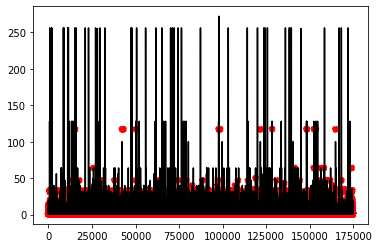

In [34]:
rcParams['figure.figsize'] = 100, 20
x_ax = range(len(X_test))
plt.plot(x_ax,y_test,label = 'actual',color = 'k',linestyle = '-')
plt.scatter(x_ax,ytest_pred,label = 'predicted',color = 'r',linestyle = '--')
if not os.path.exists('classification'):
    os.makedirs('classification')
plt.savefig('classification/NNodesdt2.png')

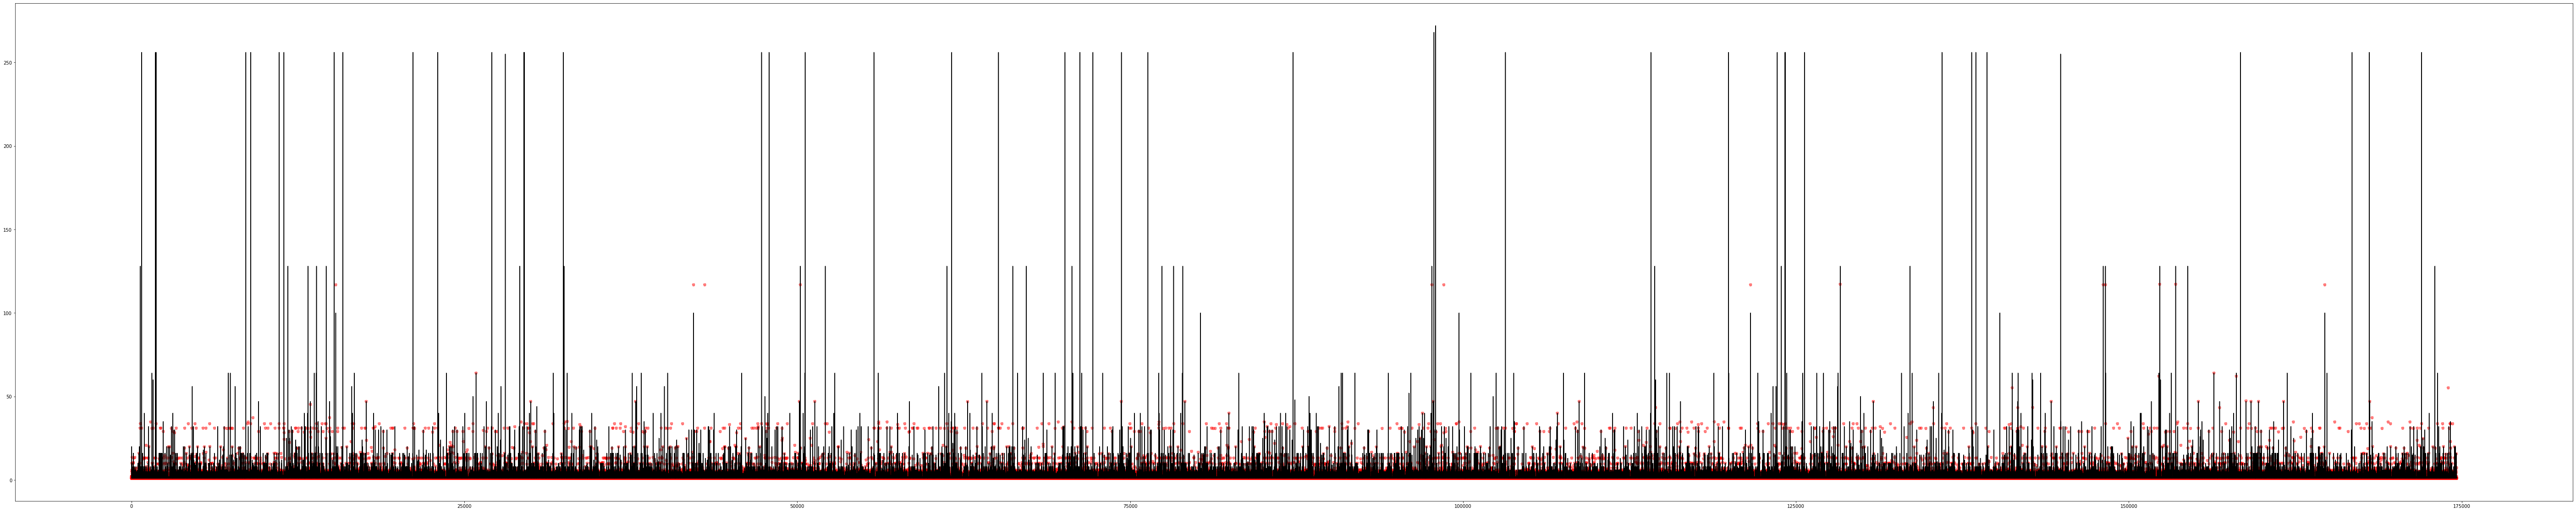

In [35]:
rcParams['figure.figsize'] = 100, 20
x_ax = range(len(X_test))
plt.plot(x_ax,y_test,label = 'actual',color = 'k',linestyle = '-')
plt.scatter(x_ax,ytest_pred2,label = 'predicted',color = 'r',alpha = 0.5,linestyle = '--')
if not os.path.exists('classification'):
    os.makedirs('classification')
plt.savefig('classification/NNodesrf2.png')

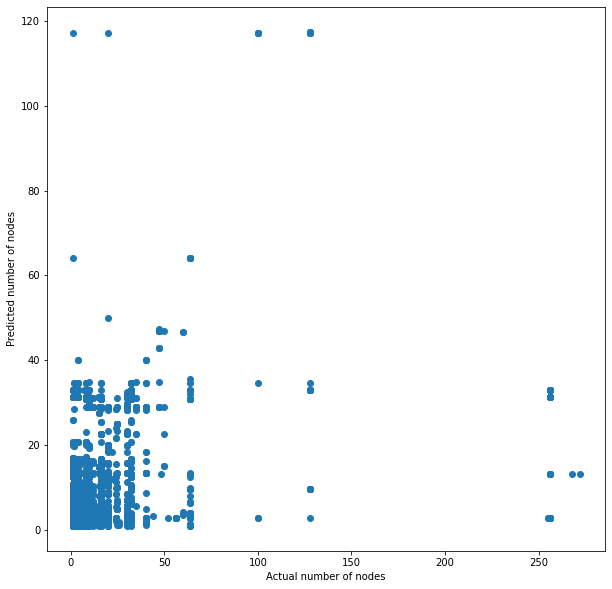

In [36]:
rcParams['figure.figsize'] = 10, 10
plt.scatter(y_test,ytest_pred,label = 'actual vs Predicted')
plt.xlabel("Actual number of nodes")
plt.ylabel("Predicted number of nodes")
if not os.path.exists('classification'):
    os.makedirs('classification')
plt.savefig('classification/nnodesdt2_new.png')

rcParams['figure.figsize'] = 10, 10
plt.scatter(y_test,ytest_pred2,label = 'actual vs Predicted')
if not os.path.exists('classification'):
    os.makedirs('classification')
plt.savefig('classification/nnodesrf2_new.png')

## MaxRSS prediction

In [75]:
slurm2 = slurm1.copy()

In [76]:
slurm2['JobID'] = slurm2['JobID'].apply(str)
def case1(value):
    if '.' in value:
        return value.split('.')[0]
    else:
        return value
slurm2['JobID'] = slurm2['JobID'].map(lambda x: case1(x))

In [77]:
slurm2['JobID'] = slurm2['JobID'].infer_objects()

In [78]:
slurm3 = slurm2.groupby('JobID', as_index=False).agg({'MaxRSS':'max'})

In [79]:
slurm3.head(5)

,JobID,MaxRSS
0,1000000,1.2960
1,1000001,1.2960
2,1000002,1.2960
3,1000003,1.2960
4,1000004,1.2960


In [80]:
waittimee = pd.merge(waittime, slurm3, on=['JobID'])

In [81]:
waittimee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886368 entries, 0 to 886367
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   UID                886368 non-null  float64
 1   JobID              886368 non-null  object 
 2   Account            886368 non-null  int64  
 3   NCPUS              886368 non-null  int64  
 4   Submittimestamp    886368 non-null  float64
 5   Start              886368 non-null  object 
 6   End                886368 non-null  object 
 7   Eligibletimestamp  886368 non-null  float64
 8   Starttimestamp     886368 non-null  object 
 9   Endtimestamp       886368 non-null  object 
 10  AllocNodes         886368 non-null  int64  
 11  AllocCPUS          886368 non-null  int64  
 12  TimelimitRaw       886368 non-null  float64
 13  NNodes             886368 non-null  int64  
 14  Submit             886368 non-null  object 
 15  State              886368 non-null  object 
 16  Ex

In [82]:

waittimee = waittimee.dropna(subset=['MaxRSS'])

In [83]:
prediction2 = waittimee[['Account','TimelimitRaw','NNodes','NCPUS','Partition','MaxRSS','State']]

In [84]:
prediction2 = prediction2.loc[(prediction2['State'] == 'COMPLETED')]

In [85]:
prediction2.shape

(576181, 7)

In [86]:
regression2 = prediction2[['Account','NNodes','Partition','TimelimitRaw','NCPUS','MaxRSS']]

In [87]:
regression2['TimelimitRaw'] = regression2['TimelimitRaw'] * 60

In [88]:
# regression2 = regression2.loc[(regression2['NNodes'] > 1)]

In [89]:
regression2.describe()

,Account,NNodes,TimelimitRaw,NCPUS,MaxRSS
count,576181.0000,576181.0000,576181.0000,576181.0000,576181.0000
mean,56.9050,1.7110,27441.7321,68.2260,5397.3005
std,22.3916,5.6369,93546.0346,224.7120,19511.7658
min,2.0000,1.0000,60.0000,1.0000,0.3400
25%,46.0000,1.0000,1800.0000,40.0000,49.8160
50%,59.0000,1.0000,3600.0000,40.0000,235.3800
75%,77.0000,1.0000,21600.0000,40.0000,944.2000
max,81.0000,272.0000,1814400.0000,10880.0000,524779.6760


In [90]:
X = regression2.iloc[:,0:5]
y = regression2.iloc[:,5:6]

In [91]:
X.head()

,Account,NNodes,Partition,TimelimitRaw,NCPUS
67,81,256,all,1200.0000,10240
70,81,4,all,7200.0000,160
71,81,4,all,7200.0000,160
72,81,4,all,7200.0000,160
73,81,4,all,7200.0000,160


In [92]:
label_encoder = preprocessing.LabelEncoder()
X['Partition']= label_encoder.fit_transform(X['Partition'])
X['Partition'].unique()

array([0, 3, 7, 1, 5, 6, 4, 2])

In [93]:
y.head()

,MaxRSS
67,3069.7000
70,124607.6520
71,124542.1640
72,124508.4320
73,124556.5960


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=X['Partition'], test_size=0.30,random_state = 42)

In [95]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(403326, 5) (172855, 5) (403326, 1) (172855, 1)


In [96]:
X_train.head()

,Account,NNodes,Partition,TimelimitRaw,NCPUS
799194,77,1,1,7200.0000,40
229581,52,1,6,300.0000,40
753557,3,8,1,600.0000,320
743641,59,1,1,3540.0000,40
454210,55,1,5,1728000.0000,40


In [97]:
y_train = y_train['MaxRSS']

In [98]:
dt = DecisionTreeRegressor(random_state = 42).fit(X_train,y_train)

In [99]:
rf = RandomForestRegressor(random_state = 42).fit(X_train,y_train)

In [100]:
print('coefficient r_sq for decision tree is %.2f'% dt.score(X_train,y_train))
print('coefficient r_sq for random forest is %.2f'% rf.score(X_train,y_train))

coefficient r_sq for decision tree is 0.54
coefficient r_sq for random forest is 0.54


In [101]:
ytrain_pred = dt.predict(X_train)
ytrain_pred2 = rf.predict(X_train)

In [102]:
print('coefficient r_sq for dt is ', r2_score(y_train,ytrain_pred))
print('mean absolute error for dt is ', mean_absolute_error(y_train,ytrain_pred))
print('mean squared error for dt is ', mean_squared_error(y_train,ytrain_pred))
print('explained variance score for dt is %.2f', explained_variance_score(y_train,ytrain_pred))

coefficient r_sq for dt is  0.5395327959450729
mean absolute error for dt is  3935.853784718446
mean squared error for dt is  177021386.88175663
explained variance score for dt is %.2f 0.5395327959450729


In [103]:
print('coefficient r_sq for rf is ', r2_score(y_train,ytrain_pred2))
print('mean absolute error for rf is ', mean_absolute_error(y_train,ytrain_pred2))
print('mean squared error for rf is ', mean_squared_error(y_train,ytrain_pred2))
print('explained variance score for rf is %.2f', explained_variance_score(y_train,ytrain_pred2))

coefficient r_sq for rf is  0.5381792698919787
mean absolute error for rf is  3957.361953879015
mean squared error for rf is  177541734.60031146
explained variance score for rf is %.2f 0.5381793269717992


In [104]:
ytest_pred = dt.predict(X_test)
ytest_pred2 = rf.predict(X_test)

In [105]:
X_test.shape

(172855, 5)

In [106]:
print('coefficient r_sq for decision tree is %.2f'% dt.score(X_test,y_test))
print('coefficient r_sq for random forest is %.2f'% rf.score(X_test,y_test))

coefficient r_sq for decision tree is 0.53
coefficient r_sq for random forest is 0.53


In [107]:
print('coefficient r_sq for decision tree is %.2f'% r2_score(y_test,ytest_pred))
print('coefficient r_sq for random forest is %.2f'% r2_score(y_test,ytest_pred2))

coefficient r_sq for decision tree is 0.53
coefficient r_sq for random forest is 0.53


In [108]:
y.head()

,MaxRSS
67,3069.7000
70,124607.6520
71,124542.1640
72,124508.4320
73,124556.5960


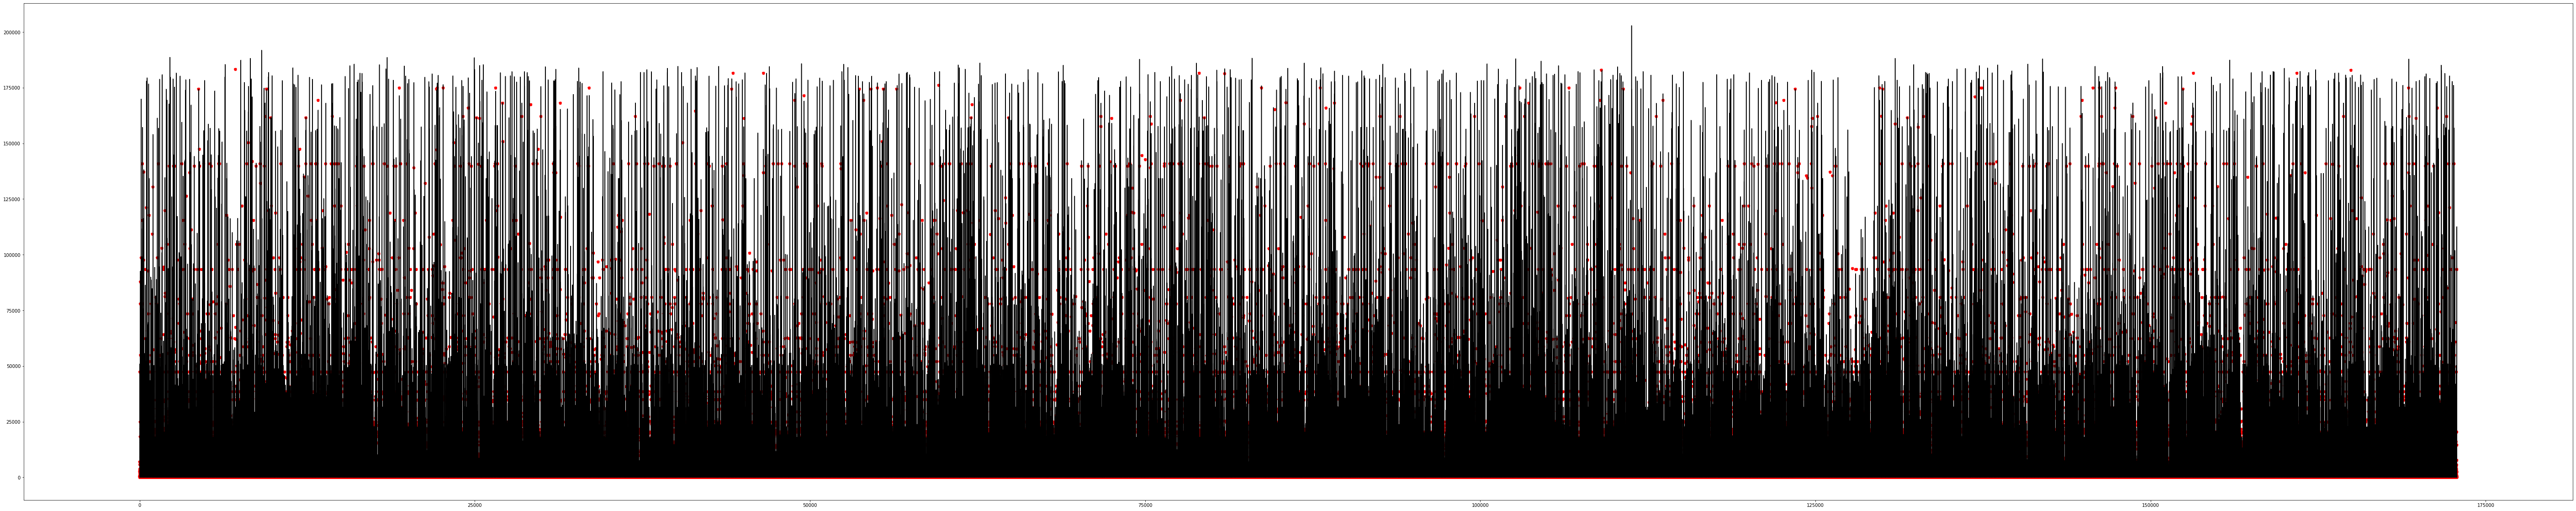

In [109]:
rcParams['figure.figsize'] = 100, 20
x_ax = range(len(X_test))
plt.plot(x_ax,y_test,label = 'actual',color = 'k',linestyle = '-')
plt.scatter(x_ax,ytest_pred,label = 'predicted',color = 'r',linestyle = '--')
if not os.path.exists('classification'):
    os.makedirs('classification')
plt.savefig('classification/RSSdt2.png')

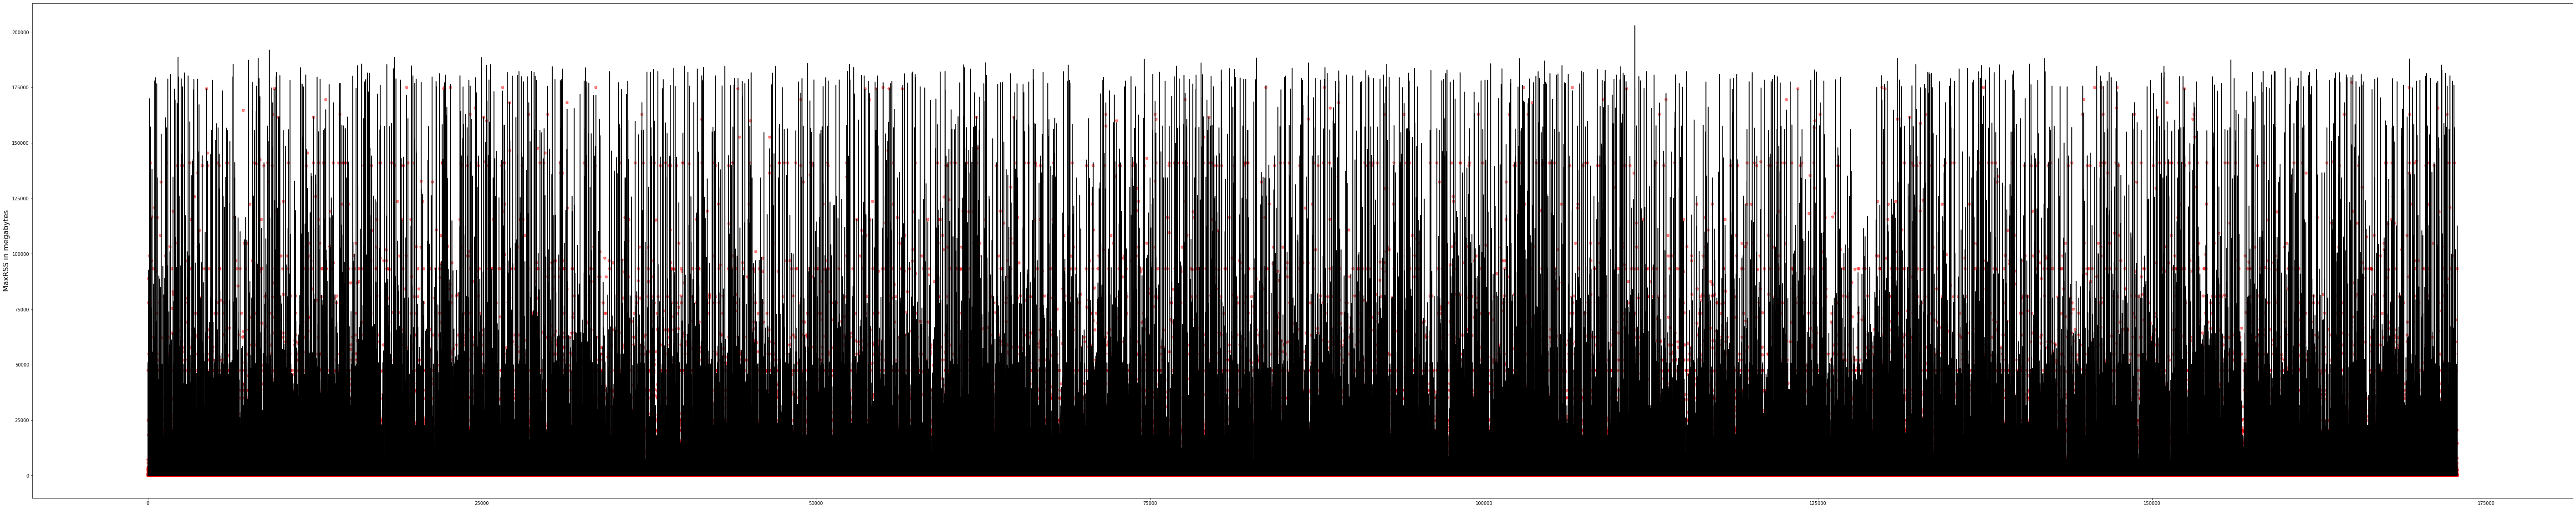

In [111]:
rcParams['figure.figsize'] = 100, 20
x_ax = range(len(X_test))
plt.plot(x_ax,y_test,label = 'actual',color = 'k',linestyle = '-')
plt.scatter(x_ax,ytest_pred2,label = 'predicted',color = 'r',alpha = 0.5,linestyle = '--')
plt.ylabel("MaxRSS in megabytes", size = 16)
if not os.path.exists('classification'):
    os.makedirs('classification')
plt.savefig('classification/RSSrf2.png')

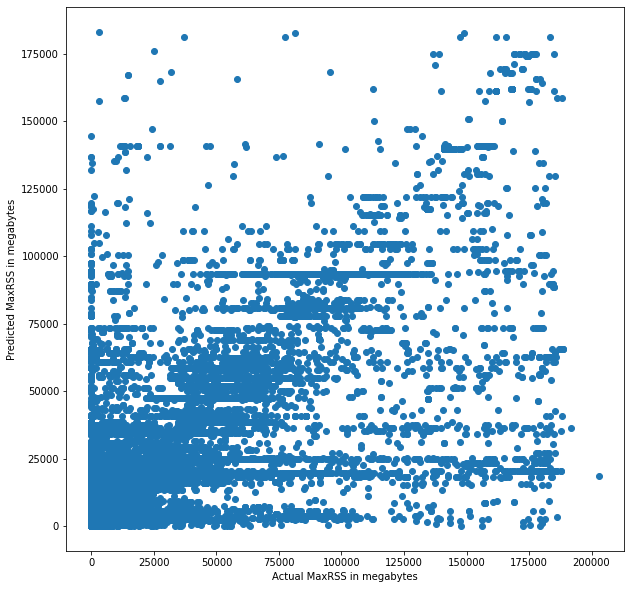

In [112]:
rcParams['figure.figsize'] = 10, 10
plt.scatter(y_test,ytest_pred,label = 'actual vs Predicted')
plt.xlabel("Actual MaxRSS in megabytes")
plt.ylabel("Predicted MaxRSS in megabytes")
if not os.path.exists('classification'):
    os.makedirs('classification')
plt.savefig('classification/rssdt2_new.png')

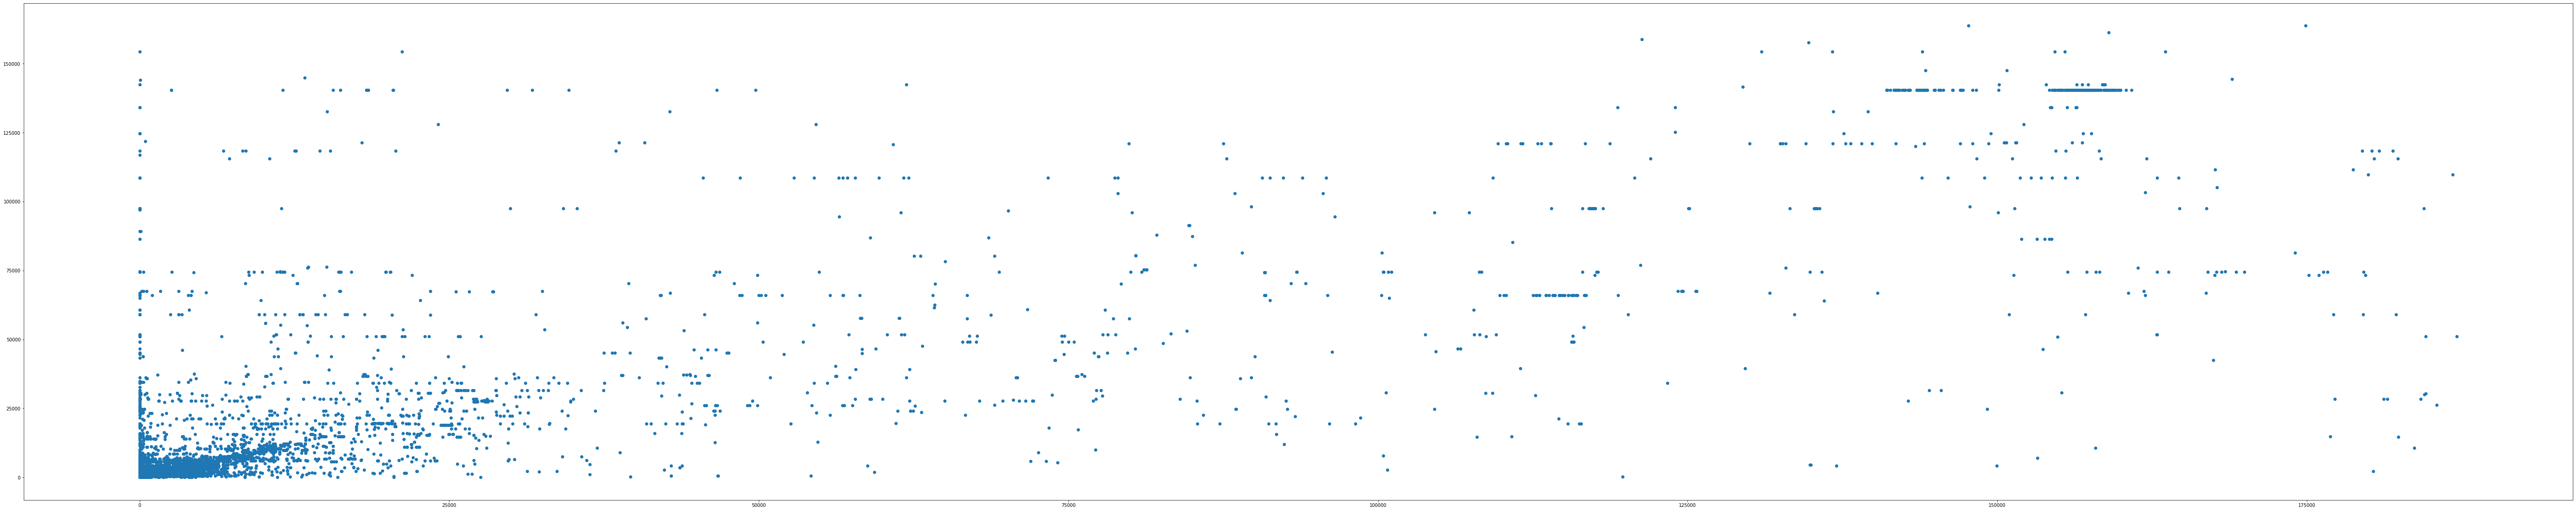

In [74]:
rcParams['figure.figsize'] = 100, 20
plt.scatter(y_test,ytest_pred2,label = 'actual vs Predicted')
if not os.path.exists('classification'):
    os.makedirs('classification')
plt.savefig('classification/rssrf2_new.png')

## Classifying jobs as failed or canceled

In [ ]:
waittime.info()

In [ ]:
waittime.loc[waittime['State'].str.contains('by'), 'State'] = 'CANCELLED'

In [ ]:
waittime.loc[waittime['State'].str.contains('CANCELLED'), 'State'] = 'FAILED_CANCELLED'
waittime.loc[waittime['State'].str.contains('FAILED'), 'State'] = 'FAILED_CANCELLED'

In [ ]:
state = waittime.loc[(waittime.State == 'FAILED_CANCELLED') | (waittime.State == 'COMPLETED')]

In [ ]:
state['TimelimitRaw'] = state['TimelimitRaw'] * 60

In [ ]:
state.describe()

In [ ]:
X = state[['UID','Account','NNodes','Partition', 'TimelimitRaw','NCPUS']]
y = state[['State']]

In [ ]:
X.head()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
X['Partition']= label_encoder.fit_transform(X['Partition'])
X['Partition'].unique()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
y['State']= label_encoder.fit_transform(y['State'])
y['State'].unique()

In [ ]:
y.head()

In [ ]:
from sklearn import preprocessing
X[['NNodes', 'TimelimitRaw']] = preprocessing.MinMaxScaler().fit_transform(X[['NNodes', 'TimelimitRaw']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y['State'],test_size=0.3,random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 42)
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
y_test.head()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

In [ ]:
group_names = ['Completed jobs Actual and predicted ','Completed Actual but predicted as Failed or Canceled ','Failed or Canceled  Actual but predicted as Completed ','Failed or Canceled Actual and predicted']

group_counts = ["{0:0.0f}".format(value) for value in

                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in

                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in

          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
if not os.path.exists('failed_canceled_jobs'):
    os.makedirs('failed_canceled_jobs')
plt.savefig('failed_canceled_jobs/cm-failed.png', bbox_inches='tight', dpi=100)
plt.show()

In [ ]:
X.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train,y_train)

In [ ]:
y_pred = log_reg.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

In [ ]:
group_names = ['Completed jobs Actual and predicted ','Completed Actual but predicted as Failed or Canceled ','Failed or Canceled  Actual but predicted as Completed ','Failed or Canceled Actual and predicted']

group_counts = ["{0:0.0f}".format(value) for value in

                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in

                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in

          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
if not os.path.exists('failed_canceled_jobs'):
    os.makedirs('failed_canceled_jobs')
plt.savefig('failed_canceled_jobs/cm-failed2.png', bbox_inches='tight', dpi=100)
plt.show()

In [ ]:
X.head()